In [64]:
import pandas as pd
import matplotlib.pyplot as plt

#### 복습
1. csv 폴더 안에 있는 drinks.csv 파일 로드
2. 데이터프레임의 정보, 결측치가 존재하는가?
3. 컬럼의 이름을 변경 -> ['국가', '맥주소비량', '증류주소비량', '와인소비량', '소비알콜량', '대륙']
4. 대륙 컬럼에 결측치가 존재 -> 결측치를 'OT'로 대체
5. 새로운 파생변수(총 술소비량) 생성 -> 맥주소비량 + 증류주소비량 + 와인소비량
6. 새로운 파생변수(도수) 생성 -> 소비 알콜량/총 술소비량*100
7. 도수 컬럼의 전체 평균보다 대륙별 도수 평균이 높은 대륙을 출력

In [65]:
df = pd.read_csv('../../../../바탕 화면/Data/csv/drinks.csv')

In [66]:
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [67]:
df.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [68]:
df.columns = ['국가', '맥주소비량', '증류주소비량', '와인소비량', '소비알콜량', '대륙']

In [69]:
df2=df.copy()

In [70]:
df2['대륙'].fillna('OT', inplace=True)

In [71]:
df2.isna().sum()

국가        0
맥주소비량     0
증류주소비량    0
와인소비량     0
소비알콜량     0
대륙        0
dtype: int64

In [72]:
df2['총 술소비량'] = df2['맥주소비량']+ df2['와인소비량']+df2['증류주소비량']

In [73]:
df2.head()

,국가,맥주소비량,증류주소비량,와인소비량,소비알콜량,대륙,총 술소비량
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319


In [74]:
df3 = df2.copy()

In [75]:
df3['도수'] = df3['소비알콜량']/df3['총 술소비량']*100

In [76]:
df3.fillna(0, inplace=True)

In [77]:
df3.isna().sum()

국가        0
맥주소비량     0
증류주소비량    0
와인소비량     0
소비알콜량     0
대륙        0
총 술소비량    0
도수        0
dtype: int64

In [78]:
df3

,국가,맥주소비량,증류주소비량,와인소비량,소비알콜량,대륙,총 술소비량,도수
0,Afghanistan,0,0,0,0.0,AS,0,0.000000
1,Albania,89,132,54,4.9,EU,275,1.781818
2,Algeria,25,0,14,0.7,AF,39,1.794872
3,Andorra,245,138,312,12.4,EU,695,1.784173
4,Angola,217,57,45,5.9,AF,319,1.849530
...,...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436,1.766055
189,Vietnam,111,2,1,2.0,AS,114,1.754386
190,Yemen,6,0,0,0.1,AS,6,1.666667
191,Zambia,32,19,4,2.5,AF,55,4.545455


In [101]:
con_mean=df3[['대륙','도수']].groupby(
    ['대륙']
).mean()

In [102]:
overall_mean=df3['도수'].mean()

In [103]:
con_mean


,도수
대륙,
AF,4.974072
AS,1.635903
EU,1.752705
OC,1.689543
OT,1.785407
SA,1.786790


In [104]:
overall_mean

2.6114806003105255

In [114]:
flag = con_mean['도수'] > overall_mean
flag


대륙
AF     True
AS    False
EU    False
OC    False
OT    False
SA    False
Name: 도수, dtype: bool

In [115]:
con_mean.loc[flag]

,도수
대륙,
AF,4.974072


- 총 술 소비량을 기준으로 우리나라는 몇 위인가?
    1. 총 술 소비량을 기준으로 내림차순 정렬
    2. 국가 컬럼의 데이터가 South Korea인 데이터의 인덱스와 총 술소비량 데이터를 확인
    3. 전체 데이터를 기준으로 막대 그래프를 생성하고 한국의 막대의 색상을 변경하고 주석을 추가

In [121]:
drinks=df3.copy()

In [126]:
drinks.sort_values(['총 술소비량'], ascending=False, inplace=True)

In [128]:
drinks.reset_index(drop=True, inplace=True)

In [131]:
drinks.loc[drinks['국가']=='South Korea']

,국가,맥주소비량,증류주소비량,와인소비량,소비알콜량,대륙,총 술소비량,도수
98,South Korea,140,16,9,9.8,AS,165,5.939394


In [133]:
korea_index = drinks.loc[drinks['국가']=='South Korea'].index[0]


In [135]:
korea_value = drinks.loc[korea_index, '총 술소비량']

In [136]:
korea_value

165

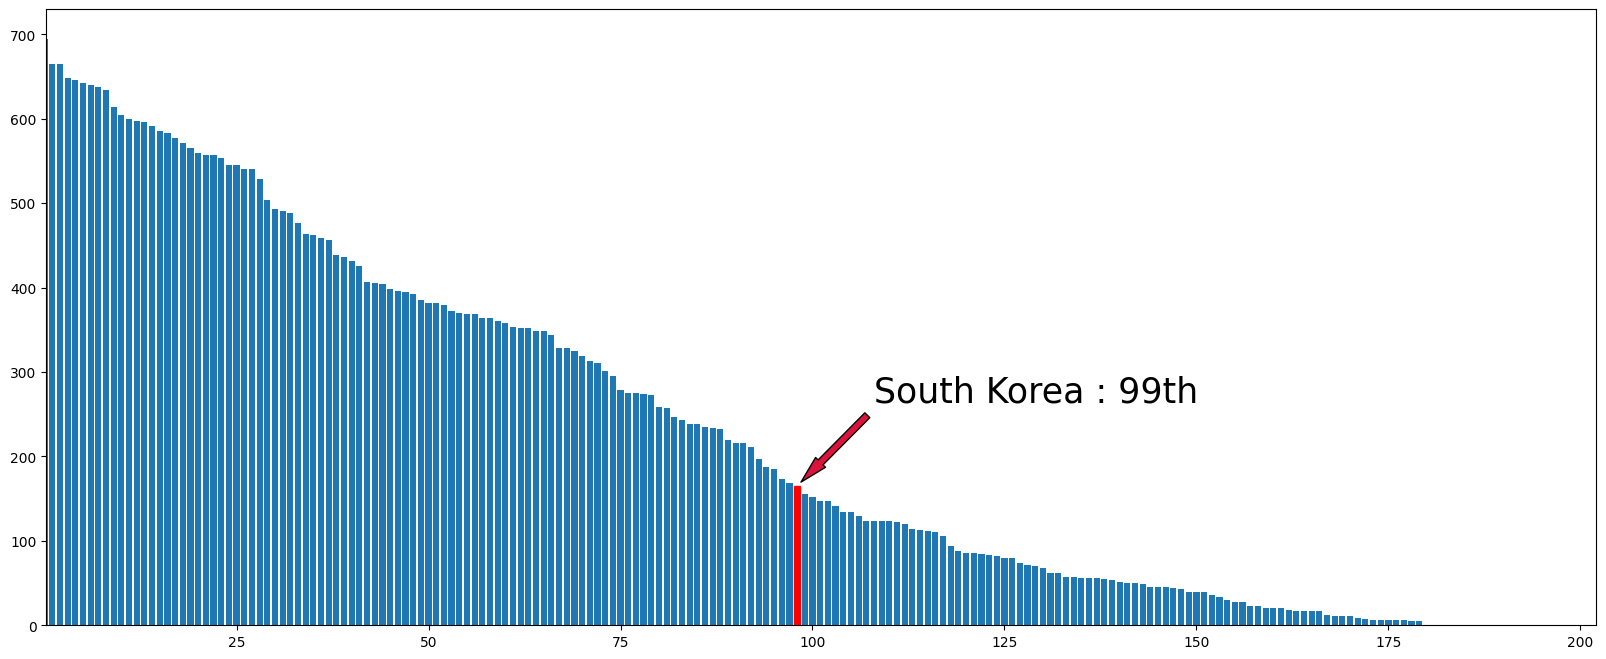

In [155]:
x = drinks.index
y = drinks['총 술소비량']
# 그래프의 크기 변경
plt.figure(figsize=(20,8))

bar_list = plt.bar(x,y)
# South Korea의 막대를 선택하여 막대의 색상을 변경
bar_list[korea_index].set_color('r')

# 주석
plt.annotate(
    f'South Korea : {korea_index + 1}th',
    xy=(korea_index,korea_value),
    xytext=(korea_index+10, korea_value+100),
    fontsize = 25,
    arrowprops={
        'facecolor' : 'crimson',
        'edgecolor' : 'k',
        'headwidth' : 10,
        'headlength' : 20,
        'width' : 5,
        'shrink' : 0.05
    }
)

plt.xlim(0.200)
plt.show()